In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import pandas as pd

In [ ]:
# 와인 데이터셋 불러오기
wine = load_wine()
X = wine.data  # 특성 데이터
y = wine.target  # 레이블 데이터

In [ ]:
df_wine = pd.DataFrame(X, columns=wine.feature_names)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [ ]:
# 데이터 표준화 (스케일링)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
lr = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 1.0, random_state=1)
#C = 1.0 이 기본
# 규제효과 조율시 C 조율

In [ ]:
lr.fit(X_train_std, y_train)
print('훈련 정확도:', lr.score(X_train_std, y_train))
print('테스트 정확도:', lr.score(X_test_std, y_test))

훈련 정확도: 1.0
테스트 정확도: 0.9814814814814815


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


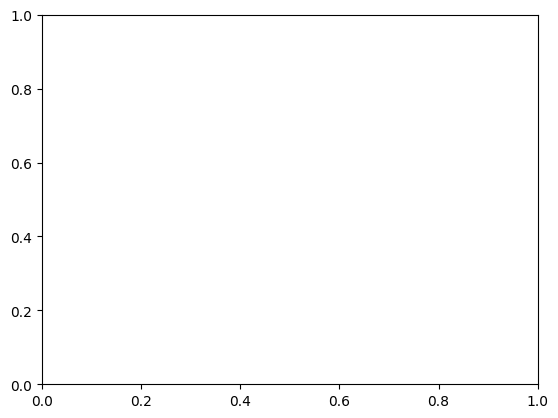

In [ ]:
fit = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

In [ ]:
weights, params = [], []

for c in np.arange(-4., 6.):
  lr = LogisticRegression(solver = 'liblinear', penalty = 'l1', C = 10. **c, random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

weights = np.array(weights)

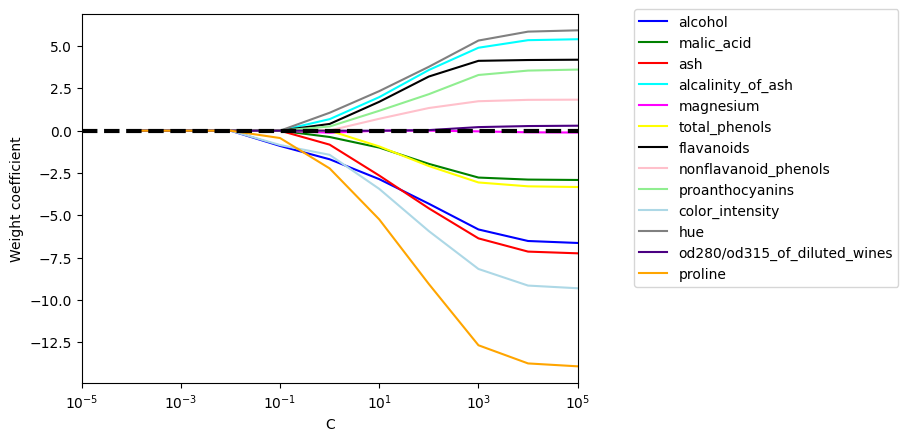

In [ ]:
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column],
             color=color)

# 수평선(0) 추가
plt.axhline(0, color='black', linestyle='--', linewidth=3)

# X축 범위 설정
plt.xlim([10**(-5), 10**5])

# 그래프 레이블 설정
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.xscale('log')

# 범례 설정
plt.legend(loc='upper left')

# 그래프의 범례 위치를 설정
plt.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)

# 그래프 표시
plt.show()